First, we import the required modules and functions, and define a helper function which will be used for Figures 1 and 2.

In [1]:
%matplotlib notebook

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import cm
from matplotlib.text import TextPath
from scipy import interpolate
from pydlv import data_reader, dl_model_3, dl_generator, dl_plotter, trajectory_plotter, data_analyser

def get_choice_patches():
    screen_patch = mpl_patches.Rectangle((-1.1, -0.1), 2.2, 1.3, fill=False, lw=3)
    left_patch = mpl_patches.Rectangle((-1.05, 0.85), 0.3, 0.3, fill=True, lw=1, 
                                   facecolor='white', edgecolor='black', alpha=0.2)
    right_patch = mpl_patches.Rectangle((0.75, 0.85), 0.3, 0.3, fill=True, lw=1, 
                                   facecolor='white', edgecolor='black', alpha=0.2)
    left_text = mpl_patches.PathPatch(TextPath((-1.0, 0.9), 'A', size=0.3, backgroundcolor='white'))
    right_text = mpl_patches.PathPatch(TextPath((0.8, 0.9), 'B', size=0.3))

    return screen_patch, left_patch, right_patch, left_text, right_text

Create a directory for the figures if it is not already there 

In [2]:
if not os.path.exists('figures'):
    os.makedirs('figures')

Then we read the data from O'Hora et al. (2013) (see DLV tutorial on how to get and prepare the data) and create the objects we use in preparing the figures.

In [3]:
dr = data_reader.DataReader()
data = dr.get_processed_data(path='csv/processed_data_high_low.csv')

model = dl_model_3.DLModel3()
dlg = dl_generator.DLGenerator(model)

da = data_analyser.DataAnalyser()

# Figure 1

<IPython.core.display.Javascript object>


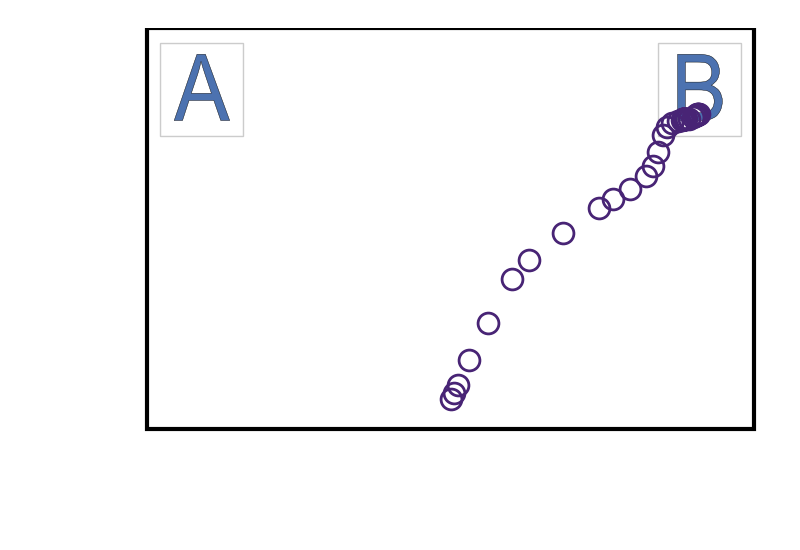

In [4]:
def plot_sample_trajectory(data, subj_id, trial_no):
    x_lim = [-1.2, 1.2]
    y_lim = [-0.2, 1.2]
    
    tickLabelFontSize = 20
    axisLabelFontSize = 24

    sns.set_style('white')    
    fig = plt.figure(tight_layout=True)
    ax = fig.add_subplot(111)
    ax.set_xlabel(r'x coordinate', fontsize=axisLabelFontSize)
    ax.set_ylabel(r'y coordinate', fontsize=axisLabelFontSize)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.tick_params(axis='both', which='major', labelsize=tickLabelFontSize)
    
    traj_color = cm.viridis(0.1)

    trajectory = data.loc[subj_id, trial_no]    
    ax.plot(trajectory.x, trajectory.y, color=traj_color, ls='none', marker='o', ms=15,
            markerfacecolor='none', markeredgewidth=2, markeredgecolor=traj_color, 
            label='Mouse trajectory')

    # draw screen above the surface and choice options on it
    patches = get_choice_patches()
    for patch in patches:
        ax.add_patch(patch)
        
    ax.set_axis_off()
    plt.savefig('figures/sample_traj.png')
    
plot_sample_trajectory(data=data, subj_id=8792, trial_no=13)

# Figure 2

<IPython.core.display.Javascript object>


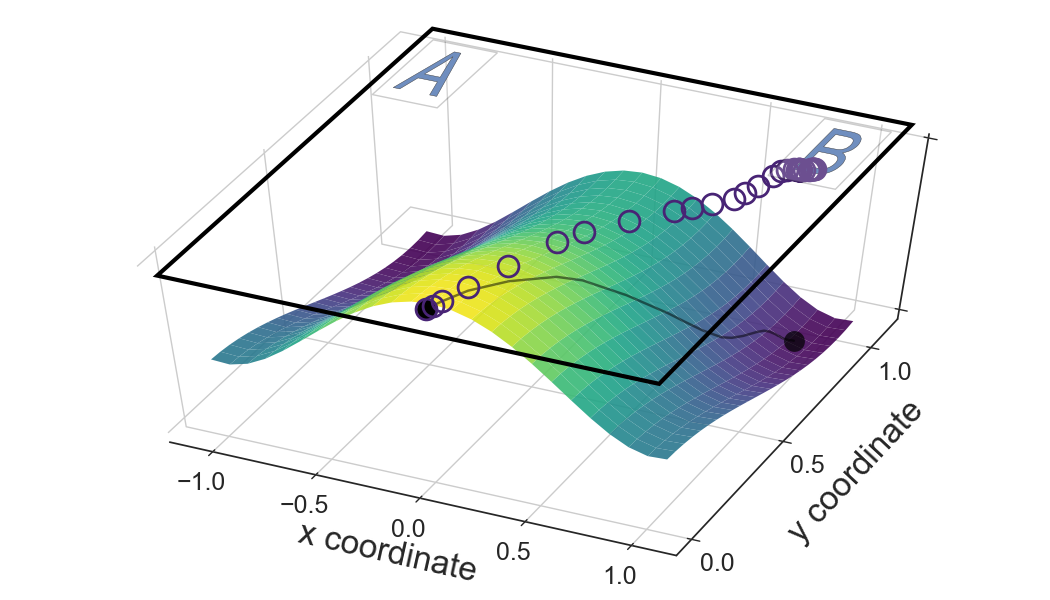

In [5]:
def plot_baseline_landscape_overlay(dlg, data, subj_id, trial_no):  
    dlp = dl_plotter.DLPlotter(elev=55, azim=-65)
        
    x_grid, y_grid, dl = dlg.get_model_dl(dlg.model.get_baseline_params()*4)
    x=(x_grid[1:]+x_grid[:-1])/2
    y=(y_grid[1:]+y_grid[:-1])/2
    f = interpolate.interp2d(x,y,dl,kind='cubic')
    
    ax = dlp.plot_surface(x_grid, y_grid, dl, cmap=cm.viridis, alpha=0.9)
    
    ax.set_xticks([-1, -0.5, 0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    
    ax.w_zaxis.set_ticklabels([])
    
    sns.set_style('white')
    
    cmap = cm.viridis
    traj_color = cmap(0.1)    
    trajectory = data.loc[subj_id, trial_no]
    z = f(trajectory.x.values, trajectory.y.values)
    if trajectory.x.values[-1]>0:
        z= np.diag(z)
    else:
        z=np.diag(np.fliplr(z))
    
    # plot trajectory on a surface
    ax.plot(trajectory.x.values, trajectory.y.values, z, color='black', alpha=0.5)
    
    # plot marble 
    ax.plot([0.], [0.], [0.], marker='o', markersize=15, color = 'black', alpha=0.7)
    ax.plot([trajectory.x.values[-1]], [trajectory.y.values[-1]], [z[-1]], 
            marker='o', markersize=15, color='black', alpha=0.7)
    
    # draw screen above the surface and choice options on it
    patches = get_choice_patches()
    for patch in patches:
        ax.add_patch(patch)
        art3d.pathpatch_2d_to_3d(patch, z=0, zdir='z')
        
    # plot trajectory on a screen
    ax.plot(trajectory.x, trajectory.y, zs=0, zdir='z', color=traj_color, ls='none', 
            alpha=1.0, marker='o', ms=15, markerfacecolor='none', markeredgewidth=2, 
            markeredgecolor=traj_color, label='Mouse trajectory')
    plt.savefig('figures/baseline_dlv.png')
    
plot_baseline_landscape_overlay(dlg=dlg, data=data, subj_id=8792, trial_no=13)

# Figure 3

Figure 3 was assembled in PowerPoint, so there is no source code for generating it.

# Figure 4

<IPython.core.display.Javascript object>


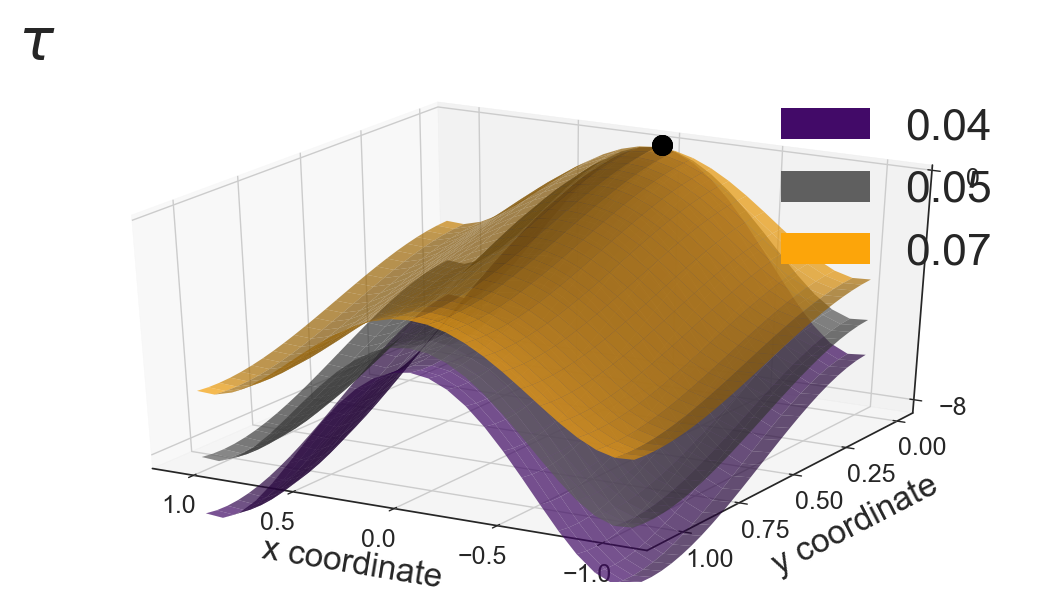

<IPython.core.display.Javascript object>


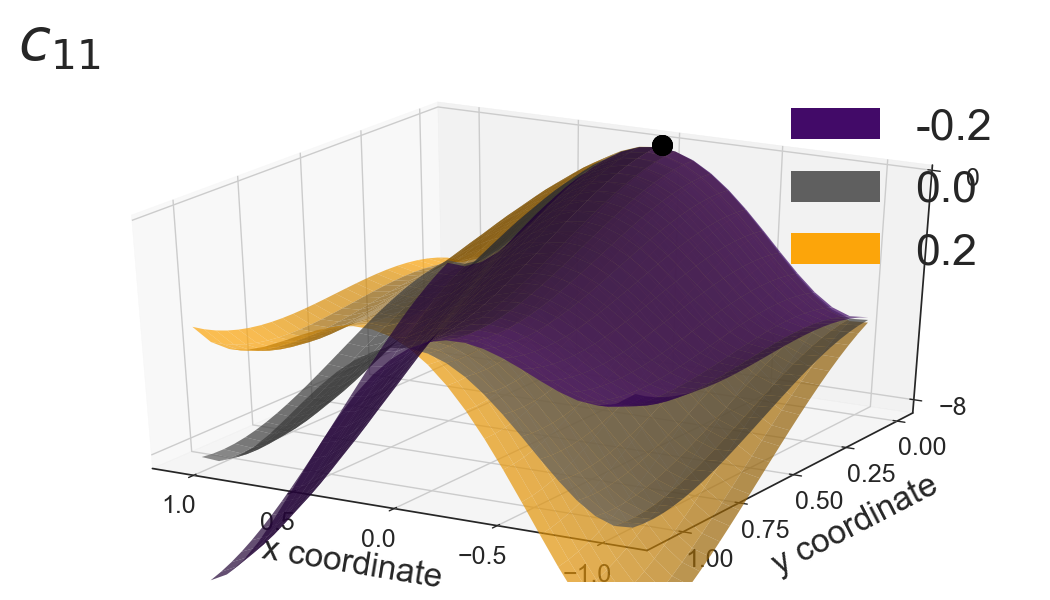

<IPython.core.display.Javascript object>


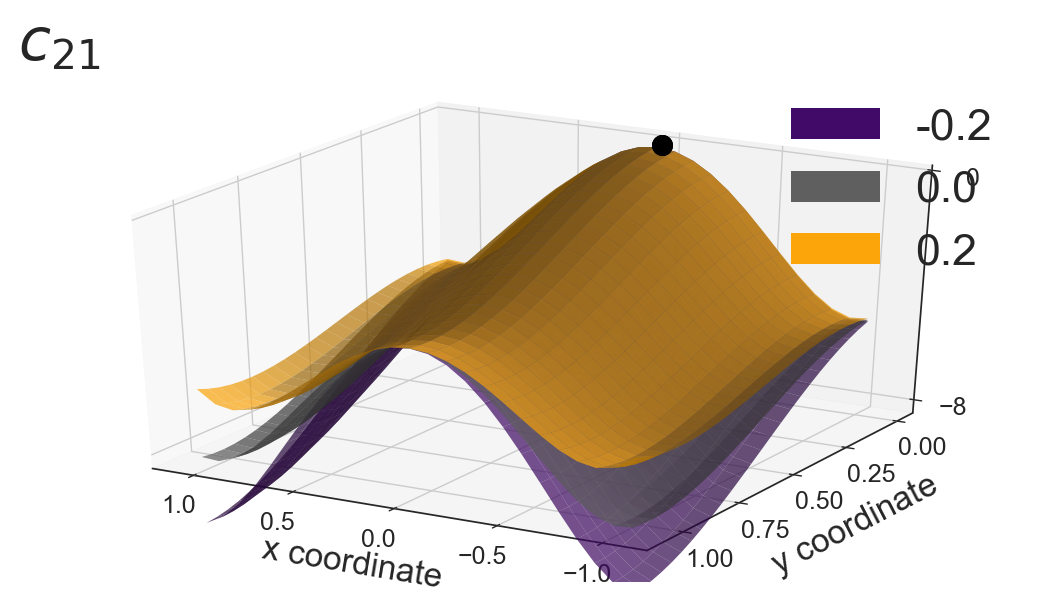

<IPython.core.display.Javascript object>


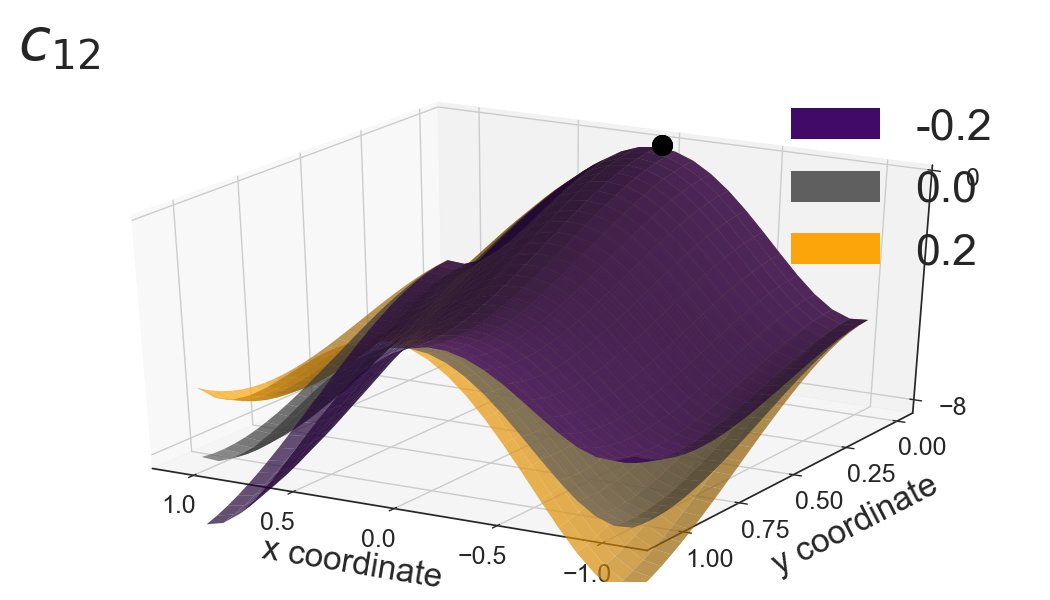

In [6]:
def plot_dl_variations(dlg, param_names, param_values, colors):
    labels = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
    for i, param_name in enumerate(param_names):
        dlp = dl_plotter.DLPlotter(elev=30, azim=120)
    
        if i>0:
            param_range = np.linspace(param_values[i][0], param_values[i][1], 3)
        else:
            param_range = np.array(param_values[i])
    
        current_params = model.get_baseline_params()
        for n, param_value in enumerate(param_range):
            current_params[i] = param_value
            x_grid, y_grid, dl = dlg.get_model_dl(current_params)
            scale_z = True if n==1 else False
            dlp.plot_surface(x_grid, y_grid, dl, color = colors[n], alpha=0.7, scale_z=scale_z)
        
        title_format = r'$\%s$' if param_name=='tau' else r'$%s$'
        dlp.ax.set_title(title_format % (param_name), loc='left', fontsize=42)        
        dlp.ax.legend(labels, param_range, fontsize=32)
        plt.savefig('figures/param_variations_%s.png' % param_name)

param_names = ['tau', 'c_{11}', 'c_{21}', 'c_{12}']
k = 0.2
param_values = [[0.04, 0.05, 0.07], [-k*1.0, k*1.0], [-k*1.0, k*1.0], [-k*1.0, k*1.0]]
colors = [cm.inferno(0.2), cm.Greys(0.7), cm.inferno(0.8)]

plot_dl_variations(dlg, param_names, param_values, colors)


# Figure 5

For Figures 5 to 8 we need the csv files with the fitted parameters. Let's generate those (you can also run `demos/fit_dl_to_data.py`). Not that the following code takes a while to execute, so be patient. This is because the parameters are generated for every subject, not only those illustrated in the figures.

In [7]:
def get_fit_parameters(data, methods=[9], by='subject', csv_path='csv'):
    '''
    The "methods" parameter defines which optimization routines are used to fit the model 
    parameters to the trajectories (see dl_generator.py for details). The recommended 
    methods are 6 (L-BFGS-B) or 9 (SLSQP). Multiple method codes can be supplied to find best-fit 
    parameters by several methods.
    
    The "by" defines whether the decision landscape is fitted to each trial 
    individually (by='trial'), to blocks of trials (by='block'), 
    or to all trajectories of each subject (by='subject')
    '''
    if not os.path.exists(csv_path):
        os.makedirs(csv_path)
    
    model = dl_model_3.DLModel3()           
    dlg = dl_generator.DLGenerator(model)
    
    for method in methods:
        print('By %s, method %i' % (by, method))
        if by == 'trial':
            fit_dl = lambda traj: dlg.fit_dl_single_traj(traj, method)
            params = data.groupby(level = ['subj_id', 'trial_no']).apply(fit_dl)
            params.index = params.index.droplevel(2)

        elif by == 'block':
            fit_dl = lambda trajs: dlg.fit_dl_mult_traj(trajs, method)        
            params = data.groupby(by=['subj_id', 'block_no']).apply(fit_dl)
            params.index = params.index.droplevel(2)
            
        elif by == 'subject':
            fit_dl = lambda trajs: dlg.fit_dl_mult_traj(trajs,  method)    
            params = data.groupby(level='subj_id').apply(fit_dl)
            params.index = params.index.droplevel(1)
            
        print('By %s, method %i, median error %f' % (by, method, params.error.median()))
        
        file_name = csv_path + '/fit_params_by_%s_method_%i.csv' % (by, method)        
        params.to_csv(file_name)

dr = data_reader.DataReader()        
data = dr.get_processed_data(path='csv/processed_data_high_low.csv')

get_fit_parameters(data, by='trial')
get_fit_parameters(data, by='block')
get_fit_parameters(data, by='subject')

By trial, method 9
By trial, method 9, median error 3.087762
By block, method 9
By block, method 9, median error 7.607230
By subject, method 9
By subject, method 9, median error 9.532193


Now that parameters are generated, use them to visualise decision landscapes

<IPython.core.display.Javascript object>


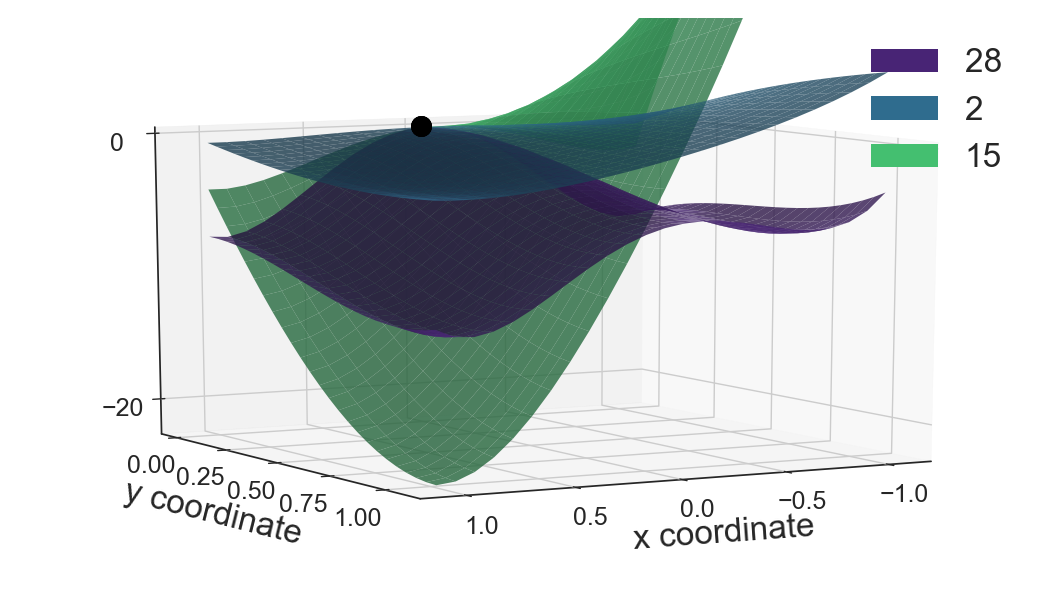

<IPython.core.display.Javascript object>


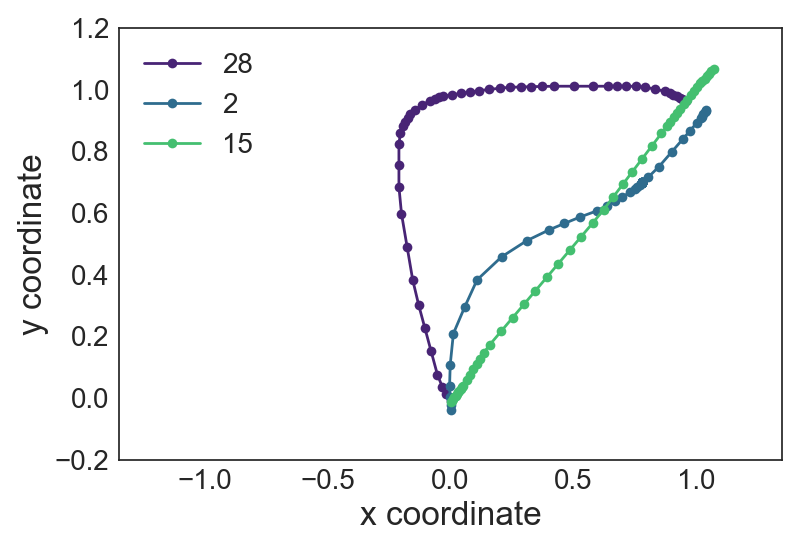

high_chosen        True
motion_time        0.37
max_d          0.770824
Name: (90, 28), dtype: object
high_chosen        True
motion_time        0.72
max_d          0.234782
Name: (90, 2), dtype: object
high_chosen         True
motion_time         0.15
max_d          0.0178667
Name: (90, 15), dtype: object


In [8]:
def plot_surfaces(dlg, params, subj_id, trials, colors):
    dlp = dl_plotter.DLPlotter(elev=10, azim=61)
    for i, trial_no in enumerate(trials):
        x, y, dl = dlg.get_model_dl(params.loc[subj_id, trial_no][2:2+dlg.model.n_params])
        dlp.plot_surface(x, y, dl, color=colors[i], alpha=0.8) 
    dlp.add_legend(colors, trials)
    plt.savefig('figures/trials_%i_dlv.png' % (subj_id))

def plot_trajectories(data, subj_id, trials, colors):
    tp = trajectory_plotter.TrajectoryPlotter()
    for i, trial_no in enumerate(trials):
        tp.plot_trajectory(data.loc[subj_id, trial_no], color=colors[i], label=trial_no)
        trial_info = data.loc[subj_id, trial_no].iloc[0][['high_chosen', 'motion_time', 'max_d']]
        print(trial_info)
    tp.add_legend()
    plt.savefig('figures/trials_%i_traj.png' % (subj_id))

def compare_dlv(subj_id, trials):
    fit_params = pd.read_csv('csv/fit_params_by_trial_method_9.csv', 
                             header=0, index_col=['subj_id', 'trial_no'])
    cmap = cm.viridis
    colors = [cmap(0.1), cmap(0.35), cmap(0.7)]
          
    model = dl_model_3.DLModel3()  
    dlg = dl_generator.DLGenerator(model) 
    plot_surfaces(dlg, fit_params, subj_id, trials, colors)
    
    dr = data_reader.DataReader()
    data = dr.get_processed_data(path='csv/processed_data_high_low.csv')
    plot_trajectories(data, subj_id, trials, colors)
    
subj_id = 90
trials = [28, 2, 15]
compare_dlv(subj_id=subj_id, trials=trials)

# Figure 6

<IPython.core.display.Javascript object>


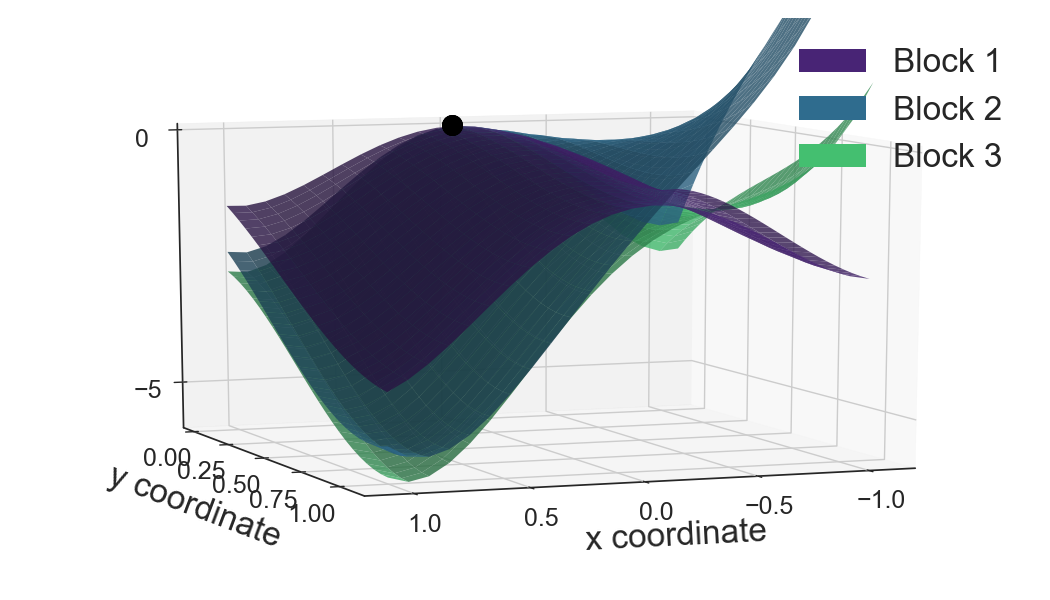

<IPython.core.display.Javascript object>


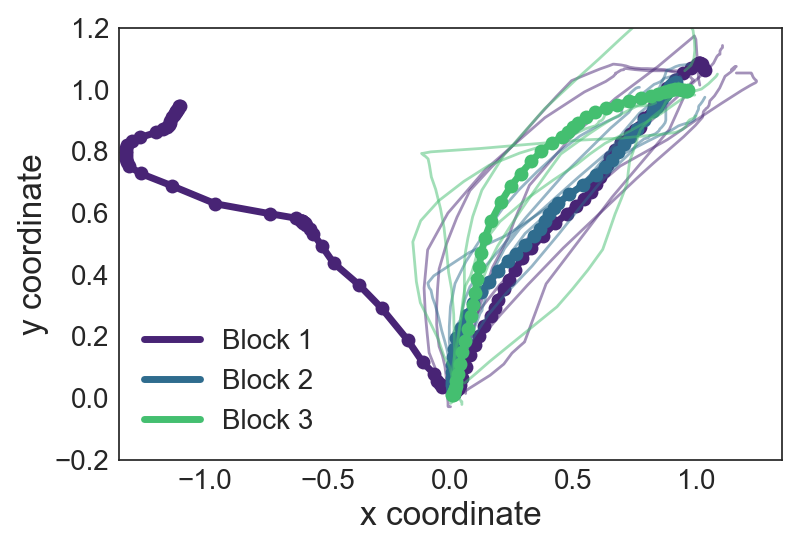


 Block 1

             motion_time     max_d
high_chosen                       
False           1.084000 -0.282065
True            0.942143  0.184985

 Block 2

             motion_time     max_d
high_chosen                       
True            0.716833  0.182156

 Block 3

             motion_time     max_d
high_chosen                       
True            0.594333  0.314279
high_chosen  False  True 
block_no                 
1              1.0    7.0
2              0.0    6.0
3              0.0    6.0


In [9]:
def plot_surfaces(dlg, fit_params, subj_id, blocks, colors, labels):
    dlp = dl_plotter.DLPlotter(elev=10, azim=69)
    for i, block_no in enumerate(blocks):
        x, y, dl = dlg.get_model_dl(fit_params.loc[subj_id, block_no][2:2+dlg.model.n_params])
        dlp.plot_surface(x, y, dl, color=colors[i], alpha=0.8)
    dlp.add_legend(colors, labels)
    plt.savefig('figures/blocks_%i_dlv.png' % (subj_id))

def plot_trajectories(data, subj_id, blocks, colors, labels):
    tp = trajectory_plotter.TrajectoryPlotter()
    
    for i, block_no in enumerate(blocks):
        block_trajectories = data[data.block_no==block_no].loc[subj_id]
        tp.plot_mean_trajectories(block_trajectories, colors[i], labels[i])
        block_info = block_trajectories[['high_chosen', 'motion_time', 'max_d']].\
                        groupby(level='trial_no').first().groupby('high_chosen').mean()
        print('\n %s\n' % (labels[i]))
        print(block_info)      
    tp.add_legend_mean_traj(colors, labels)
    plt.savefig('figures/blocks_%i_traj.png' % (subj_id))

def compare_dlv(subj_id, blocks):
    fit_params = pd.read_csv('csv/fit_params_by_block_method_9.csv', 
                             index_col=['subj_id', 'block_no'], header=0)  
    labels = ['Block %i' % (block) for block in blocks]
    
    cmap = cm.viridis
    colors = [cmap(0.1), cmap(0.35), cmap(0.7)]
    
    model = dl_model_3.DLModel3()   
    dlg = dl_generator.DLGenerator(model)
    plot_surfaces(dlg, fit_params, subj_id, blocks, colors, labels)
    
    dr = data_reader.DataReader()
    data = dr.get_processed_data(path='csv/processed_data_high_low.csv')
    plot_trajectories(data, subj_id, blocks, colors, labels)
    
    da = data_analyser.DataAnalyser()
    stats = da.get_block_stats(data)
    print(stats.loc[subj_id])
    
#subj_id = 233
subj_id = 1334
blocks = [1, 2, 3]
compare_dlv(subj_id, blocks)

# Figure 7

<IPython.core.display.Javascript object>


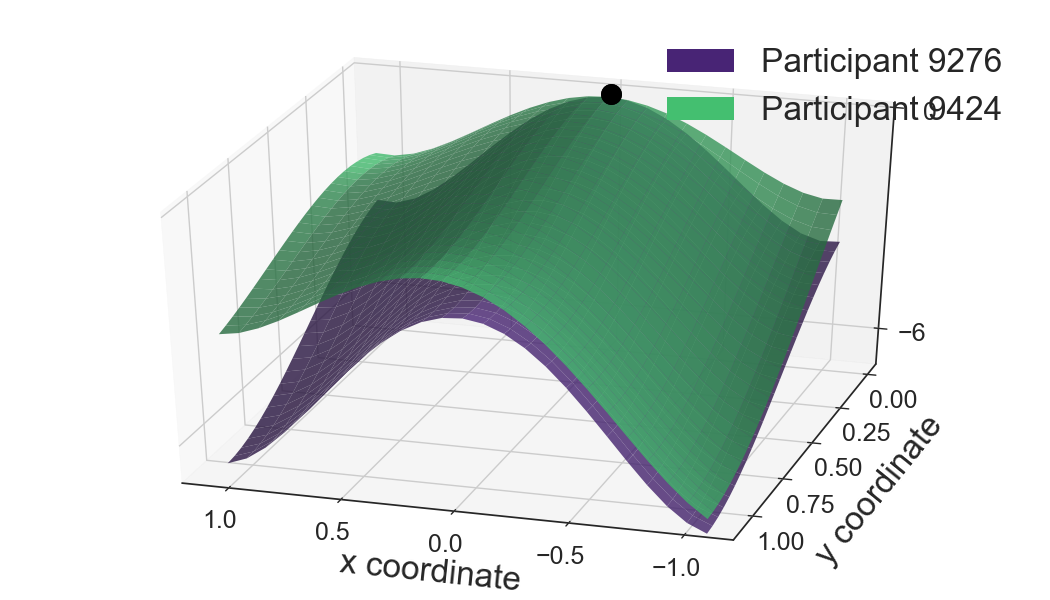

<IPython.core.display.Javascript object>


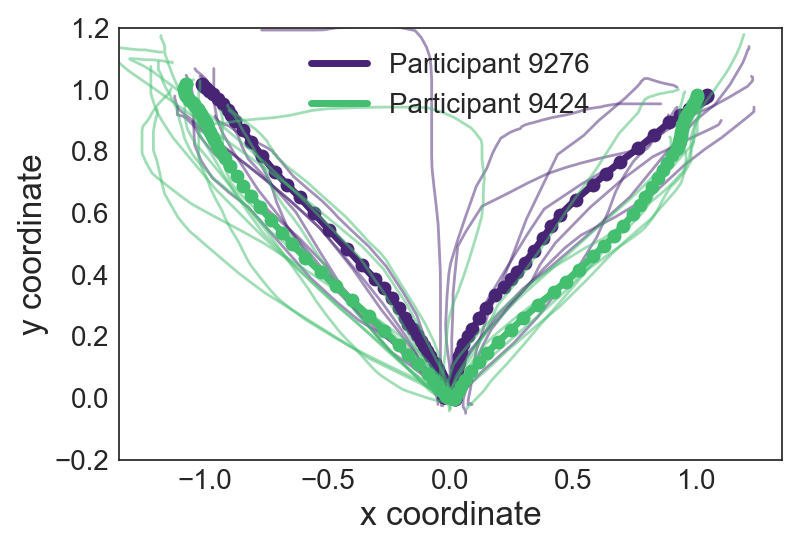


 Participant 9276

             motion_time     max_d
high_chosen                       
False           0.469889  0.042579
True            0.552250  0.182039

 Participant 9424

             motion_time     max_d
high_chosen                       
False           0.404615 -0.071715
True            0.539286 -0.083476
high_chosen  False  True 
subj_id                  
9276           9.0    8.0
9424          13.0    7.0


In [10]:
def plot_surfaces(dlg, fit_params, subjects, colors, labels):
    dlp = dl_plotter.DLPlotter(elev=33, azim=107)
    for i, subj_id in enumerate(subjects):
        x, y, dl = dlg.get_model_dl(fit_params.loc[subj_id][2:2+dlg.model.n_params])
        dlp.plot_surface(x, y, dl, color=colors[i], alpha=0.8)
    dlp.add_legend(colors, labels)
    plt.savefig('figures/subjects_%i_%i_dlv.png' % (subjects[0], subjects[1]))

def plot_trajectories(data, subjects, colors, labels):
    tp = trajectory_plotter.TrajectoryPlotter()
    for i, subj_id in enumerate(subjects):
        tp.plot_mean_trajectories(data.loc[subj_id], colors[i], labels[i])
        subj_info = data.loc[subj_id, ['high_chosen', 'motion_time', 'max_d']].\
                        groupby(level='trial_no').first().groupby('high_chosen').mean()
        print('\n %s\n' % (labels[i]))
        print(subj_info)      
    tp.add_legend_mean_traj(colors, labels)
    plt.savefig('figures/subjects_%i_%i_traj.png' % (subjects[0], subjects[1]))

def compare_dlv(subjects):
    fit_params = pd.read_csv('csv/fit_params_by_subject_method_9.csv', 
                             index_col='subj_id', header=0)
    labels = ['Participant %i' % (subj_id) for subj_id in subjects]
    
    cmap = cm.viridis
    colors = [cmap(0.1), cmap(0.7)]
    
    model = dl_model_3.DLModel3()   
    dlg = dl_generator.DLGenerator(model)
    plot_surfaces(dlg, fit_params, subjects, colors, labels)
    
    dr = data_reader.DataReader()
    data = dr.get_processed_data(path='csv/processed_data_high_low.csv')
    plot_trajectories(data, subjects, colors, labels)
    
    da = data_analyser.DataAnalyser()
    stats = da.get_subjects_stats(data)
    print(stats.loc[subjects])

compare_dlv(subjects=[9276, 9424])

# Figure 8

<IPython.core.display.Javascript object>


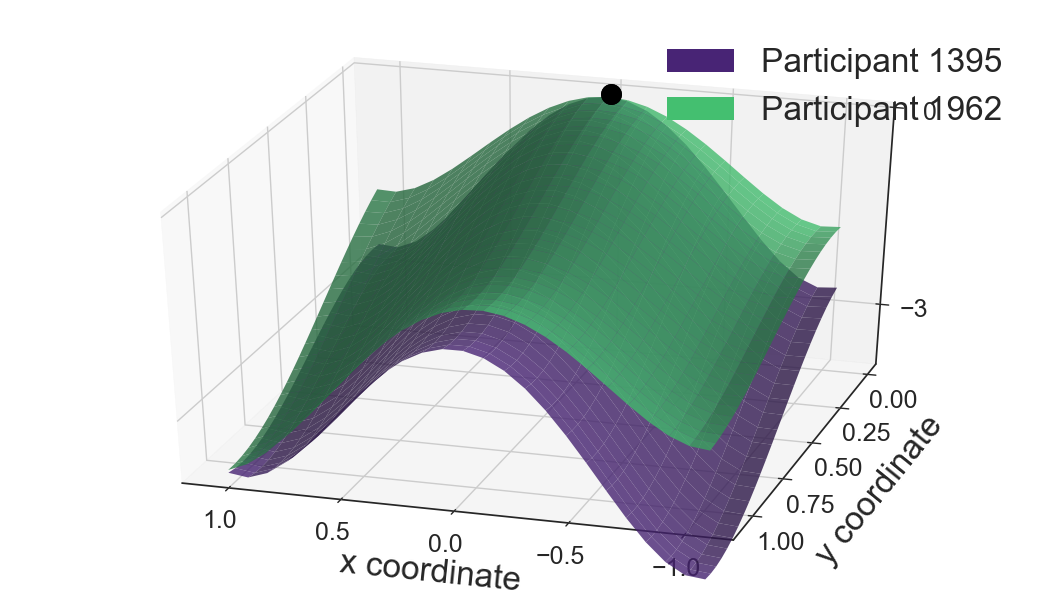

<IPython.core.display.Javascript object>


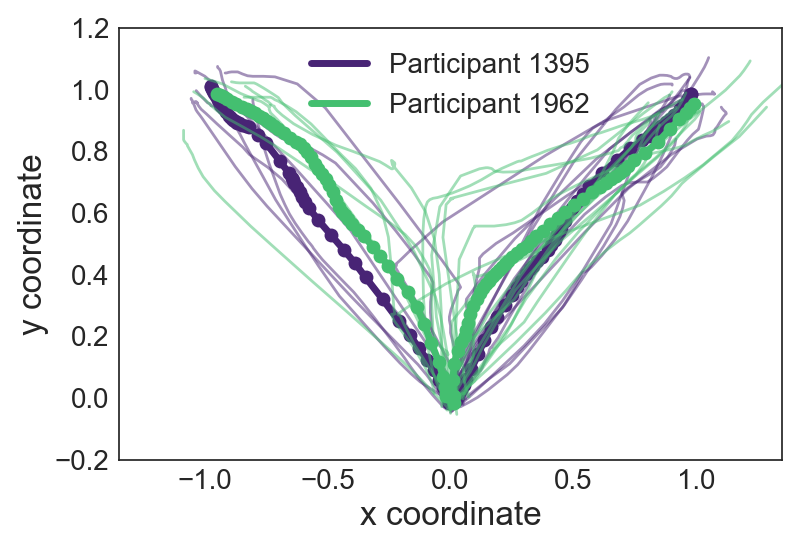


 Participant 1395

             motion_time     max_d
high_chosen                       
False           0.610286  0.058169
True            0.717929  0.104472

 Participant 1962

             motion_time     max_d
high_chosen                       
False           0.627167  0.177143
True            0.907133  0.209549
high_chosen  False  True 
subj_id                  
1395           7.0   14.0
1962           6.0   15.0


In [11]:
compare_dlv(subjects=[1395, 1962])